# AUTONORMALIZE DEMO 
Using Autonormalize to normalize a kaggle dataset about food purchasing.

In [1]:
import sys, os

import pandas as pd

sys.path.append(os.path.abspath(os.path.join('..', '..',)))

import autonormalize as an

In [2]:
food_df = pd.read_csv(os.path.abspath(os.path.join('..','..', 'autonormalize/downloads/food.csv')), encoding='latin1')
food_df = food_df.drop(columns=food_df.columns[10:])
food_df.head()

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71


In [3]:
entityset = an.auto_entityset(food_df, name='Foods')

100%|██████████| 10/10 [00:06<00:00,  1.68it/s]


In [4]:
entityset

Entityset: Foods
  Entities:
    Item Code_Element Code_Area Code [Rows: 21477, Columns: 4]
    Element Code [Rows: 2, Columns: 2]
    Item Code [Rows: 117, Columns: 2]
    Area Code [Rows: 174, Columns: 5]
    Area Abbreviation [Rows: 169, Columns: 2]
  Relationships:
    Item Code_Element Code_Area Code.Area Code -> Area Code.Area Code
    Item Code_Element Code_Area Code.Item Code -> Item Code.Item Code
    Item Code_Element Code_Area Code.Element Code -> Element Code.Element Code
    Area Code.Area Abbreviation -> Area Abbreviation.Area Abbreviation

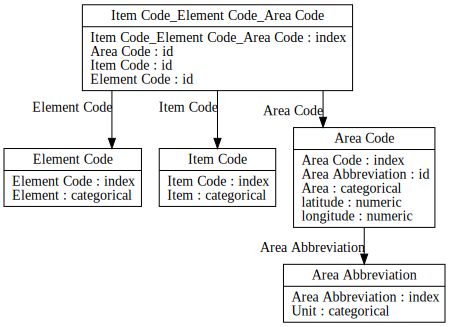

In [5]:
entityset.plot()

In [7]:
import featuretools as ft
fm, features = ft.dfs(entityset=entityset, target_entity='Item Code_Element Code_Area Code')
features

[<Feature: Area Code>,
 <Feature: Item Code>,
 <Feature: Element Code>,
 <Feature: Area Code.Area Abbreviation>,
 <Feature: Area Code.Area>,
 <Feature: Area Code.latitude>,
 <Feature: Area Code.longitude>,
 <Feature: Item Code.Item>,
 <Feature: Element Code.Element>,
 <Feature: Area Code.COUNT(Item Code_Element Code_Area Code)>,
 <Feature: Area Code.NUM_UNIQUE(Item Code_Element Code_Area Code.Item Code)>,
 <Feature: Area Code.NUM_UNIQUE(Item Code_Element Code_Area Code.Element Code)>,
 <Feature: Area Code.MODE(Item Code_Element Code_Area Code.Item Code)>,
 <Feature: Area Code.MODE(Item Code_Element Code_Area Code.Element Code)>,
 <Feature: Area Code.Area Abbreviation.Unit>,
 <Feature: Item Code.COUNT(Item Code_Element Code_Area Code)>,
 <Feature: Item Code.NUM_UNIQUE(Item Code_Element Code_Area Code.Area Code)>,
 <Feature: Item Code.NUM_UNIQUE(Item Code_Element Code_Area Code.Element Code)>,
 <Feature: Item Code.MODE(Item Code_Element Code_Area Code.Area Code)>,
 <Feature: Item Code.MO